#Kaggle Dataset- Retail Data Analytics: [link to Challenge](https://www.kaggle.com/datasets/manjeetsingh/retaildataset/data)

**Context**

The Challenge - One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – the challenge is to predict which departments will be affected and to what extent.

**Content**
You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

Within the Excel Sheet, there are 3 Tabs – Stores, Features and Sales

**The Task**
1. Predict the department-wide sales for each store for the following year
2. Model the effects of markdowns on holiday weeks
3. Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact


#Data Import

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("manjeetsingh/retaildataset")

print("Path to dataset files:", path)

100%|██████████| 3.11M/3.11M [00:00<00:00, 3.26MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/manjeetsingh/retaildataset/versions/2


In [2]:
path

'/root/.cache/kagglehub/datasets/manjeetsingh/retaildataset/versions/2'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
stores_df = pd.read_csv(path+"/stores data-set.csv")
features_df = pd.read_csv(path+"/Features data set.csv")
sales_df = pd.read_csv(path+"/sales data-set.csv")

In [5]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [8]:
print("\nMissing values in Stores Data:")
print(stores_df.isnull().sum())

print("\nMissing values in Features Data:")
print(features_df.isnull().sum())

print("\nMissing values in Sales Data:")
print(sales_df.isnull().sum())


Missing values in Stores Data:
Store    0
Type     0
Size     0
dtype: int64

Missing values in Features Data:
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Missing values in Sales Data:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


# Data Cleaning, Feature Engineering and EDA

## Data Cleaning

In [10]:
features_df['Date'] = pd.to_datetime(features_df['Date'],dayfirst=True, errors='coerce')
sales_df['Date'] = pd.to_datetime(sales_df['Date'],dayfirst=True, errors='coerce')

In [11]:
print("Invalid dates in Features Data:")
print(features_df[features_df['Date'].isna()])
print("Invalid dates in Features Data:")
print(sales_df[sales_df['Date'].isna()])

Invalid dates in Features Data:
Empty DataFrame
Columns: [Store, Date, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, IsHoliday]
Index: []
Invalid dates in Features Data:
Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
Index: []


In [12]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
features_df[markdown_cols] = features_df[markdown_cols].fillna(0)

In [13]:
features_df['CPI'] = features_df['CPI'].interpolate(method='linear', limit_direction='forward')
features_df['Unemployment'] = features_df['Unemployment'].interpolate(method='linear', limit_direction='forward')

In [14]:
print("\nMissing values in Features Data:")
print(features_df.isnull().sum())


Missing values in Features Data:
Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


In [15]:
merged_data = sales_df.merge(features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
merged_data = merged_data.merge(stores_df, on='Store', how='left')

In [16]:
merged_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


## Feature Engineering

In [17]:
merged_data['Holiday_Weight'] = merged_data['IsHoliday'].apply(lambda x: 5 if x else 1)

In [31]:
merged_data = merged_data.sort_values(by=['Store', 'Dept', 'Date'])

In [32]:
merged_data['Lagged_Sales_1'] = merged_data.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
merged_data['Lagged_Sales_2'] = merged_data.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(2)

In [66]:
temp_bins = [0, 30, 60, 90, 120]  # Define temperature ranges
temp_labels = ['Very Cold', 'Cold', 'Warm', 'Hot']
merged_data['Temperature_Bin'] = pd.cut(merged_data['Temperature'], bins=temp_bins, labels=temp_labels)

In [67]:
merged_data = pd.get_dummies(merged_data, columns=['Temperature_Bin', 'Type'], drop_first=True)

In [68]:
print("\nFeature-Engineered Dataset:")
print(merged_data.head())


Feature-Engineered Dataset:
   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  ...  Unemployment    Size  Holiday_Weight  \
0        0.0        0.0        0.0  ...         8.106  151315               1   
1        0.0        0.0        0.0  ...         8.106  151315               5   
2        0.0        0.0        0.0  ...         8.106  151315               1   
3        0.0        0.0        0.0  ...         8.106  151315               1   
4        0.0        0.0        0.0  ...         8.106  151315               1   

   Lagged

In [71]:
merged_data.to_csv('merged_data.csv', index=False)

## Data Visualization

#### Holidays impact on sales

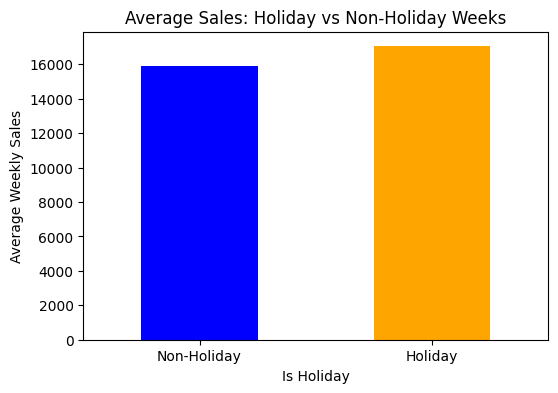

In [ ]:

holiday_sales = merged_data.groupby('IsHoliday')['Weekly_Sales'].mean()
plt.figure(figsize=(6, 4))
holiday_sales.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Sales: Holiday vs Non-Holiday Weeks")
plt.xlabel("Is Holiday")
plt.ylabel("Average Weekly Sales")
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


###Correlation of Markdowns with weekly sales

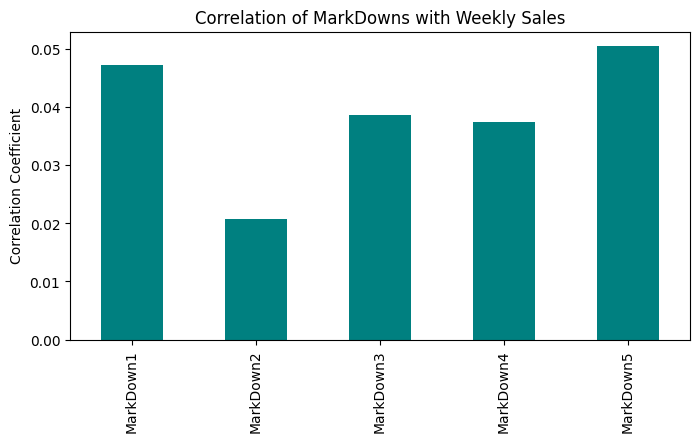

In [ ]:

markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
correlations = merged_data[markdown_cols + ['Weekly_Sales']].corr()['Weekly_Sales'].drop('Weekly_Sales')
plt.figure(figsize=(8, 4))
correlations.plot(kind='bar', color='teal')
plt.title("Correlation of MarkDowns with Weekly Sales")
plt.ylabel("Correlation Coefficient")
plt.show()


###Sales of each store

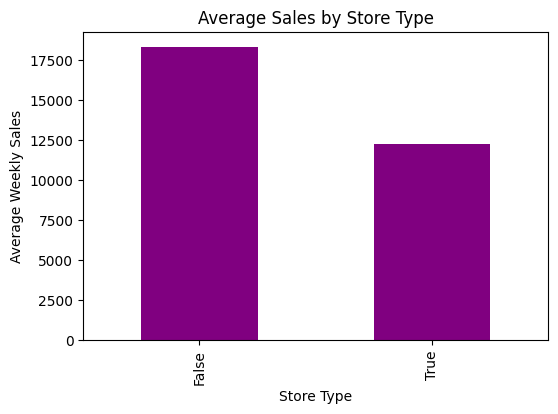

In [ ]:
type_sales = merged_data.groupby('Type_B')['Weekly_Sales'].mean()

plt.figure(figsize=(6, 4))
type_sales.plot(kind='bar', color='purple')
plt.title("Average Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Average Weekly Sales")
plt.show()


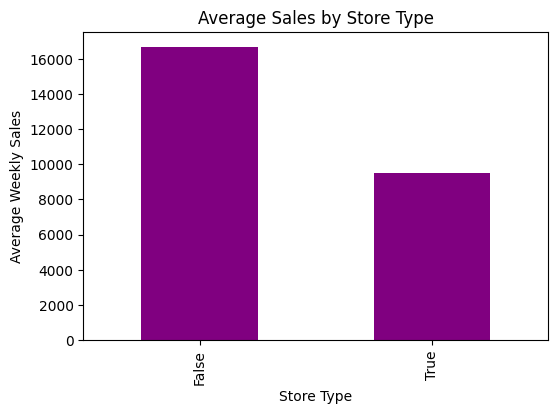

In [ ]:
type_sales = merged_data.groupby('Type_C')['Weekly_Sales'].mean()

plt.figure(figsize=(6, 4))
type_sales.plot(kind='bar', color='purple')
plt.title("Average Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Average Weekly Sales")
plt.show()


###Impact of unemployment

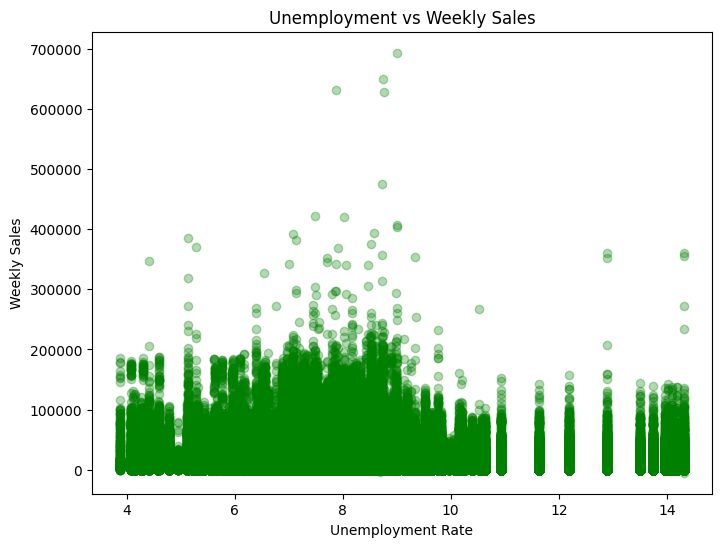

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Unemployment'], merged_data['Weekly_Sales'], alpha=0.3, color='green')
plt.title("Unemployment vs Weekly Sales")
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Sales")
plt.show()


#Models

##XG Boost

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error


# Define features and target
features = ['Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
            'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
            'Lagged_Sales_1', 'Lagged_Sales_2', 'Holiday_Weight']
target = 'Weekly_Sales'

# Drop rows with missing lagged sales values
merged_data_xgboostcopy= merged_data.copy()
merged_data_xgboostcopy = merged_data_xgboostcopy.dropna(subset=['Lagged_Sales_1', 'Lagged_Sales_2'])

# Split data into train and test based on date
train_data = merged_data_xgboostcopy[merged_data_xgboostcopy['Date'] < '2012-01-01']
test_data = merged_data_xgboostcopy[merged_data_xgboostcopy['Date'] >= '2012-01-01']

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters
param_grid = {
    'max_depth': [3, 5, 7],
    'eta': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform grid search manually
best_mae = float("inf")
best_params = None
iteration = 1  # Track the iteration number

total_combinations = (
    len(param_grid['max_depth']) *
    len(param_grid['eta']) *
    len(param_grid['subsample']) *
    len(param_grid['colsample_bytree'])
)

print(f"Total parameter combinations to test: {total_combinations}\n")

for max_depth in param_grid['max_depth']:
    for eta in param_grid['eta']:
        for subsample in param_grid['subsample']:
            for colsample_bytree in param_grid['colsample_bytree']:
                params = {
                    'objective': 'reg:squarederror',
                    'max_depth': max_depth,
                    'eta': eta,
                    'subsample': subsample,
                    'colsample_bytree': colsample_bytree,
                    'seed': 42
                }

                print(f"Testing combination {iteration}/{total_combinations}:")
                print(f"  max_depth={max_depth}, eta={eta}, subsample={subsample}, colsample_bytree={colsample_bytree}")

                cv_results = xgb.cv(
                    params,
                    dtrain,
                    num_boost_round=500,
                    nfold=3,
                    metrics='mae',
                    early_stopping_rounds=10,
                    seed=42
                )

                mean_mae = cv_results['test-mae-mean'].min()
                print(f"  Mean MAE: {mean_mae}\n")

                if mean_mae < best_mae:
                    best_mae = mean_mae
                    best_params = params

                iteration += 1

print("Grid search completed!")
print("Best Parameters:", best_params)
print("Best MAE:", best_mae)


Total parameter combinations to test: 81

Testing combination 1/81:
  max_depth=3, eta=0.01, subsample=0.6, colsample_bytree=0.6
  Mean MAE: 2316.1967228693798

Testing combination 2/81:
  max_depth=3, eta=0.01, subsample=0.6, colsample_bytree=0.8
  Mean MAE: 2181.6244810979883

Testing combination 3/81:
  max_depth=3, eta=0.01, subsample=0.6, colsample_bytree=1.0
  Mean MAE: 2145.414417250713

Testing combination 4/81:
  max_depth=3, eta=0.01, subsample=0.8, colsample_bytree=0.6
  Mean MAE: 2317.867439926217

Testing combination 5/81:
  max_depth=3, eta=0.01, subsample=0.8, colsample_bytree=0.8
  Mean MAE: 2181.665894393567

Testing combination 6/81:
  max_depth=3, eta=0.01, subsample=0.8, colsample_bytree=1.0
  Mean MAE: 2144.444311159016

Testing combination 7/81:
  max_depth=3, eta=0.01, subsample=1.0, colsample_bytree=0.6
  Mean MAE: 2320.214830273358

Testing combination 8/81:
  max_depth=3, eta=0.01, subsample=1.0, colsample_bytree=0.8
  Mean MAE: 2180.614568115306

Testing comb

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(**best_params, n_estimators=500)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Calculate MAE
test_mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {test_mae}")


Test MAE: 1999.283443335904


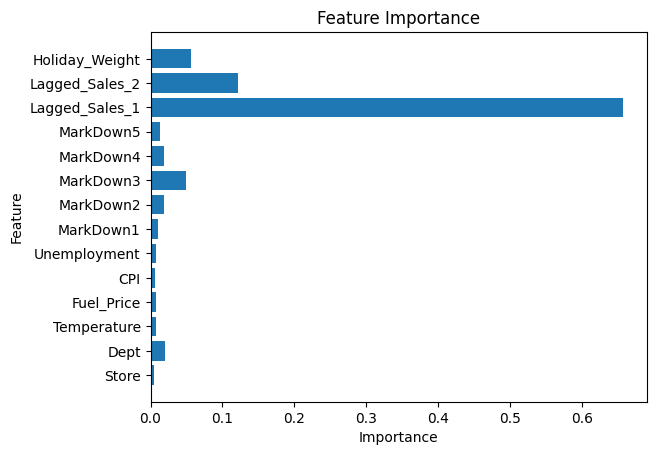


Holiday Week Analysis:
Date
2010-02-12    16352.056032
2010-09-10    15537.758883
2010-11-26    22403.336705
2010-12-31    13738.538566
2011-02-11    16111.706191
2011-09-09    15809.069483
2011-11-25    22043.563476
2011-12-30    15332.154858
2012-02-10    16664.247891
2012-09-07    16294.692957
Name: Weekly_Sales, dtype: float64


In [ ]:
# Analyze feature importance
import matplotlib.pyplot as plt

feature_importances = xgb_model.feature_importances_
plt.barh(features, feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

# Analyze markdown impact during holiday weeks
holiday_data = merged_data[merged_data['IsHoliday']]
print("\nHoliday Week Analysis:")
print(holiday_data.groupby('Date')['Weekly_Sales'].mean())


From the Feature Importance observed :



1.   Past sales are the strongest predictor, so maintaining detailed and accurate sales records is crucial for reliable forecasting
2.   Features like CPI, unemployment, and fuel prices are less impactful. Focus efforts on store-level factors like markdowns, type, and lagged sales rather than external regional factors.


##Finding the impact of each Markdown on the sales using OLS Regression

<Figure size 1000x600 with 0 Axes>

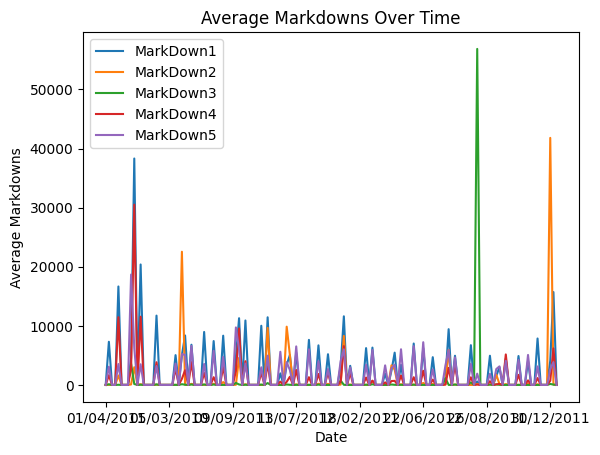

In [ ]:
plt.figure(figsize=(10, 6))
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
merged_data.groupby('Date')[markdown_cols].mean().plot()
plt.title("Average Markdowns Over Time")
plt.xlabel("Date")
plt.ylabel("Average Markdowns")
plt.legend(markdown_cols)
plt.show()


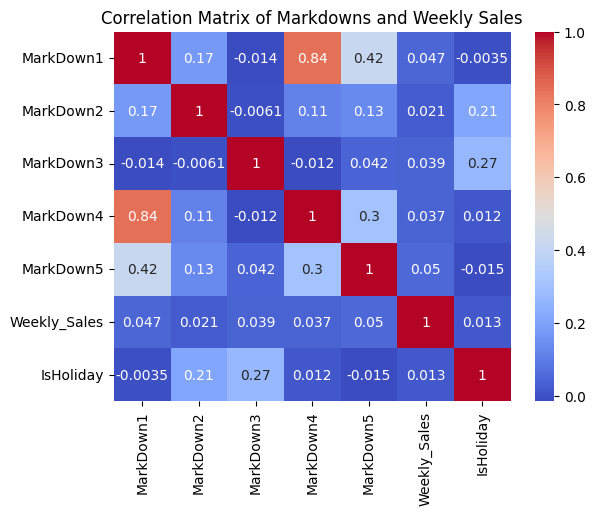

In [ ]:
correlation_matrix = merged_data[markdown_cols + ['Weekly_Sales', 'IsHoliday']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Markdowns and Weekly Sales")
plt.show()


In [ ]:
for markdown in markdown_cols:
    avg_sales = merged_data.groupby(['IsHoliday', markdown])['Weekly_Sales'].mean()
    print(f"Average Sales by Holiday and {markdown}:")
    print(avg_sales)


Average Sales by Holiday and MarkDown1:
IsHoliday  MarkDown1
False      0.00         15796.577922
           0.27          7984.048431
           0.50          4491.027551
           1.50          9449.596373
           1.94          6506.558600
                            ...     
True       20097.48     21547.481507
           20281.03     17381.606522
           22865.19     23673.702206
           26115.19     11502.280448
           36778.65     16594.507286
Name: Weekly_Sales, Length: 2280, dtype: float64
Average Sales by Holiday and MarkDown2:
IsHoliday  MarkDown2 
False      -265.76       18111.228732
           -192.00       18824.885972
           -20.00        20339.761806
           -10.98         5233.569667
           -10.50        28128.721678
                             ...     
True        82881.16     21891.513973
            89121.94     26608.877162
            92523.94     25674.335890
            97740.99     27989.657534
            104519.54    26815.144028
Nam

In [ ]:
import statsmodels.api as sm

# Regression model to evaluate markdown impact
features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday']
X = merged_data[features]
# Convert IsHoliday to integer (1 for True, 0 for False)
X['IsHoliday'] = X['IsHoliday'].astype(int)
y = merged_data['Weekly_Sales']
X = sm.add_constant(X)  # Add constant term for intercept

model = sm.OLS(y, X).fit()
print(model.summary())


<ipython-input-24-e0efe1e2cf25>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['IsHoliday'] = X['IsHoliday'].astype(int)


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     345.9
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:10:36   Log-Likelihood:            -4.8258e+06
No. Observations:              421570   AIC:                         9.652e+06
Df Residuals:                  421563   BIC:                         9.652e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.524e+04     40.351    377.759      0.0

In [ ]:
# Adding interaction terms to regression model
merged_data['MarkDown1_Holiday'] = merged_data['MarkDown1'] * merged_data['IsHoliday']
X['MarkDown1_Holiday'] = merged_data['MarkDown1_Holiday']

interaction_model = sm.OLS(y, X).fit()
print(interaction_model.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     296.6
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:10:55   Log-Likelihood:            -4.8258e+06
No. Observations:              421570   AIC:                         9.652e+06
Df Residuals:                  421562   BIC:                         9.652e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.524e+04     40.52

From the OLS Results we can see,

1. R square is 0.005 -> model will explain only 0.5% of the variation in weekly sales. (very low, implies an important variable is missing)

2. Markdown 4 has a -ve value -> it has no impact on sales

3. IsHoliday hasn't shown much change in both the models, moreover markdown1_holiday's is also statistically insignificant.Hence holidays don't effect the weekly sales massively.


From all the insights given before, the best model would be non linear, that primarily depends on past data. Hence we are using LSTM.

## LSTM

### Best parameeters using Keras tuner

Trial 10 Complete [00h 11m 16s]
val_loss: 0.0031637020874768496

Best val_loss So Far: 0.0030596989672631025
Total elapsed time: 01h 22m 36s
Best LSTM units: 128
Best activation function: relu
Best optimizer: adam
Epoch 1/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - loss: 0.0094 - val_loss: 0.0032
Epoch 2/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - loss: 0.0051 - val_loss: 0.0031
Epoch 3/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 4/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - loss: 0.0049 - val_loss: 0.0031
Epoch 5/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 6/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 79s 5ms/step - loss: 0.0049 - val_loss: 0.0031
Epoch 7/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step - loss: 0.0049 - val_loss: 0.0031
Epoch 8/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - loss: 0.0049 - val_loss: 0.0031
Epoch 9/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step -

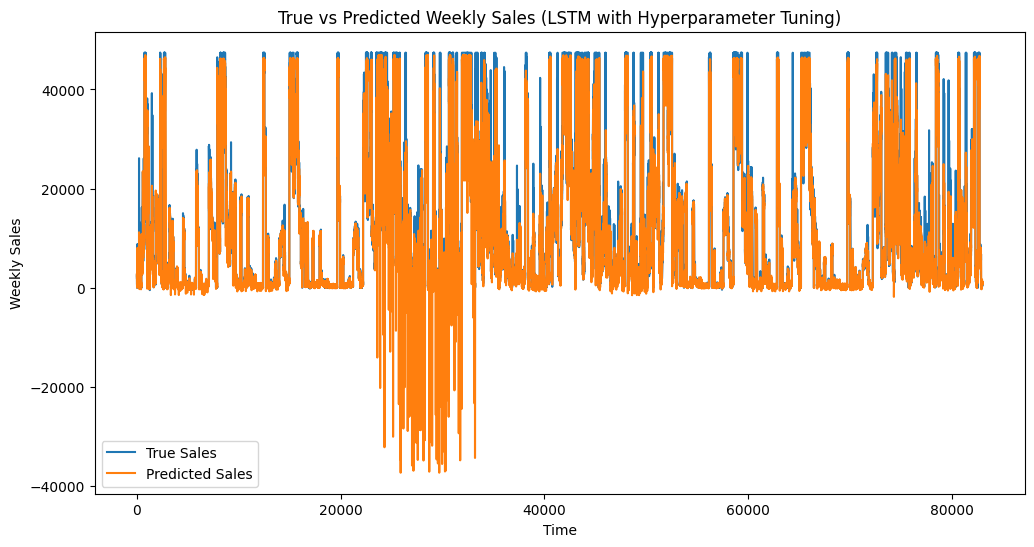

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import keras_tuner as kt

merged_data = merged_data.dropna(subset=['Lagged_Sales_1', 'Lagged_Sales_2'])


features = ['Lagged_Sales_1', 'Lagged_Sales_2', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday']
target = 'Weekly_Sales'


train_size = int(len(merged_data) * 0.8)
train_data = merged_data.iloc[:train_size]
test_data = merged_data.iloc[train_size:]


scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data[features + [target]])
scaled_test = scaler.transform(test_data[features + [target]])


def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, :-1])
        y.append(data[i, -1])
    return np.array(X), np.array(y)


n_steps = 1
X_train, y_train = create_sequences(scaled_train, n_steps)
X_test, y_test = create_sequences(scaled_test, n_steps)


def build_model(hp):
    model = Sequential()
    model.add(
        LSTM(
            units=hp.Int("units", min_value=32, max_value=128, step=32),  # Tune LSTM units
            activation=hp.Choice("activation", values=["relu", "tanh"]),  # Tune activation function
            input_shape=(X_train.shape[1], X_train.shape[2])
        )
    )
    model.add(Dense(1))
    model.compile(
        optimizer=hp.Choice("optimizer", values=["adam", "rmsprop"]),
        loss="mse",
    )
    return model

# Use Keras Tuner for hyperparameter tuning
tuner = kt.RandomSearch(
    build_model,
    objective="val_loss",
    max_trials=10,
    executions_per_trial=1,
    directory="hyperparameter_tuning",
    project_name="lstm_sales_forecasting"
)


tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


print(f"Best LSTM units: {best_hps.get('units')}")
print(f"Best activation function: {best_hps.get('activation')}")
print(f"Best optimizer: {best_hps.get('optimizer')}")

# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

# Predictions
predicted_sales = best_model.predict(X_test)

# Inverse scaling
y_test = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], len(features))), y_test.reshape(-1, 1)), axis=1))[:, -1]
predicted_sales = scaler.inverse_transform(np.concatenate((np.zeros((predicted_sales.shape[0], len(features))), predicted_sales), axis=1))[:, -1]

# Evaluation metrics
mae = mean_absolute_error(y_test, predicted_sales)
mse = mean_squared_error(y_test, predicted_sales)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_sales)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Plot true vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Sales')
plt.plot(predicted_sales, label='Predicted Sales')
plt.title('True vs Predicted Weekly Sales (LSTM with Hyperparameter Tuning)')
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


### Finetuning to get the best results

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10374/10374 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.9668e-04 - val_loss: 1.3281e-04
Epoch 2/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.2124e-04 - val_loss: 7.4926e-05
Epoch 3/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.1856e-04 - val_loss: 6.9744e-05
Epoch 4/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 1.1584e-04 - val_loss: 7.2010e-05
Epoch 5/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.0637e-04 - val_loss: 6.7319e-05
Epoch 6/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.0956e-04 - val_loss: 6.7326e-05
Epoch 7/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 1.1096e-04 - val_loss: 8.2117e-05
Epoch 8/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 1.0148e-04 - val_loss: 6.7575e-05
Epoch 9/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.1682e-04 - val_loss: 7.0116e-05
Epoch 10/20
10374/10374 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0353e-04 - val_loss: 6.7675e-05
Epoch 11/20
10374/10

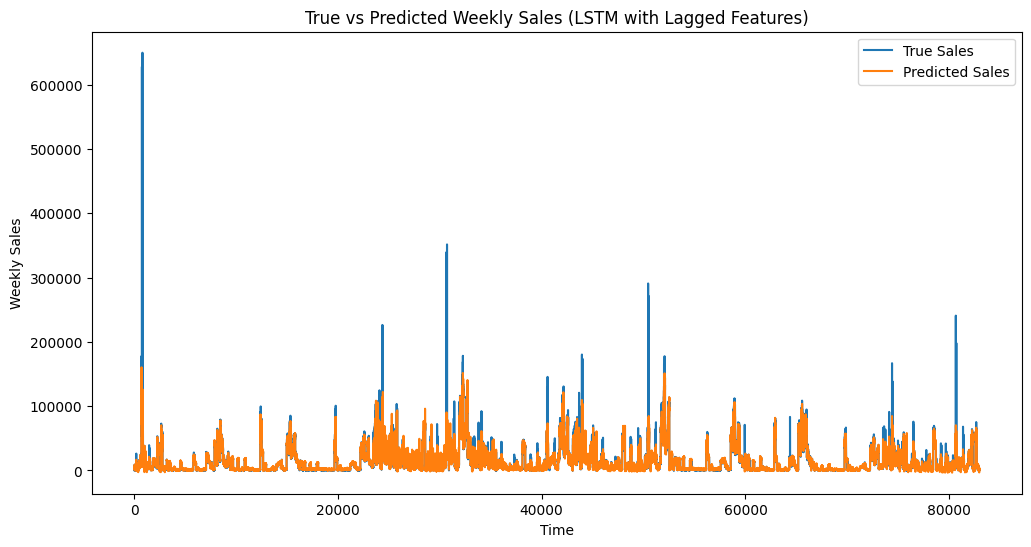

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

#Data preperation
merged_data = merged_data.dropna(subset=['Lagged_Sales_1', 'Lagged_Sales_2'])


features = ['Lagged_Sales_1', 'Lagged_Sales_2', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday']
target = 'Weekly_Sales'


train_size = int(len(merged_data) * 0.8)
train_data = merged_data.iloc[:train_size]
test_data = merged_data.iloc[train_size:]


scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data[features + [target]])
scaled_test = scaler.transform(test_data[features + [target]])

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, :-1])
        y.append(data[i, -1])
    return np.array(X), np.array(y)

n_steps = 1
X_train, y_train = create_sequences(scaled_train, n_steps)
X_test, y_test = create_sequences(scaled_test, n_steps)

# LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


predicted_sales = model.predict(X_test)

y_test = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], len(features))), y_test.reshape(-1, 1)), axis=1))[:, -1]
predicted_sales = scaler.inverse_transform(np.concatenate((np.zeros((predicted_sales.shape[0], len(features))), predicted_sales), axis=1))[:, -1]

# Evaluation metrics
mae = mean_absolute_error(y_test, predicted_sales)
mse = mean_squared_error(y_test, predicted_sales)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_sales)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Plot true vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Sales')
plt.plot(predicted_sales, label='Predicted Sales')
plt.title('True vs Predicted Weekly Sales (LSTM with Lagged Features)')
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()
